In [36]:
import os
import json
import pylab as pl
%pylab inline
import pandas as pd
import numpy as np
import zipfile

Populating the interactive namespace from numpy and matplotlib


## DATA: citibike 201707
### IDEA
#### Women riders prefer longer rides than men riders
### NULL HYPOTHESIS:
#### the percentage of women riding more than 30 minutes is the same or lower than men

_$H_0$ :  $\frac{W{\mathrm{trip duration > 30 minutes}}}{W{\mathrm{trip duration}}}  <=  \frac{M{\mathrm{trip duration > 30 minutes}}}{M_{\mathrm{trip duration}}}$


_$H_1$ : $\frac{W{\mathrm{trip duration > 30 minutes}}}{W{\mathrm{trip duration}}}  >  \frac{M{\mathrm{trip duration > 30 minutes}}}{M_{\mathrm{trip duration}}}$

significant level : 
![alpha = 0.5](https://render.githubusercontent.com/render/math?math=%5Calpha%3D0.05&mode=inline)

In [37]:
os.getenv ('PUI2016') 

'/home/cusp/yl5240/PUI2016'

In [38]:
os.getenv ('PUIDATA') 

'/home/cusp/yl5240/PUIdata'

In [39]:
!ls '/gws/open/Student/citibike'

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

In [40]:
with zipfile.ZipFile("/gws/open/Student/citibike/201707-citibike-tripdata.csv.zip","r") as zip_ref:
    zip_ref.extractall(os.getenv("PUIDATA"))

In [41]:
df = pd.read_csv(os.getenv("PUIDATA")+'/201707-citibike-tripdata.csv')

In [42]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [43]:
df.shape

(1735599, 15)

In [44]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [45]:
len((df['gender']!=1)&(df['gender']!=2))

1735599

In [46]:
df1 = df[(df['gender'] == 1)|(df['gender'] == 2)][['tripduration', 'gender']]

In [47]:
df1.shape

(1500405, 2)

In [48]:
df1.head()

,tripduration,gender
0,364,1
1,2142,1
2,328,2
3,2530,1
4,2534,2


In [52]:
df1['trip_minutes'] = round(df1['tripduration']/60, 1)

In [53]:
df1['trip_more_than_30_min'] = (df1['trip_minutes']>30).astype(float)


In [54]:
df1.head()

,tripduration,gender,trip_minutes,trip_more_than_30_min
0,364,1,6.1,0.0
1,2142,1,35.7,1.0
2,328,2,5.5,0.0
3,2530,1,42.2,1.0
4,2534,2,42.2,1.0


In [55]:
df1[['gender', 'trip_more_than_30_min']].head()

,gender,trip_more_than_30_min
0,1,0.0
1,1,1.0
2,2,0.0
3,1,1.0
4,2,1.0


In [27]:
df1.groupby(by = ['gender','trip_more_than_30_min']).count()

tripduration  trip_minutes
gender trip_more_than_30_min                            
1      0                            790703        790703
       1                            308681        308681
2      0                            257322        257322
       1                            143699        143699

In [56]:
df1.groupby(by = ['gender','trip_more_than_30_min']).mean()

tripduration  trip_minutes
gender trip_more_than_30_min                            
1      0.0                      656.027175     10.933787
       1.0                     4391.684077     73.195068
2      0.0                      738.272788     12.304452
       1.0                     3800.675167     63.344651

In [57]:
counts_w = df1['trip_more_than_30_min'][df.gender == 2].groupby([df1['trip_more_than_30_min']]).count()
counts_w

trip_more_than_30_min
0.0    364473
1.0     36548
Name: trip_more_than_30_min, dtype: int64

In [58]:
counts_m = df1['trip_more_than_30_min'][df.gender==1].groupby([df1['trip_more_than_30_min']]).count()
counts_m 

trip_more_than_30_min
0.0    1027088
1.0      72296
Name: trip_more_than_30_min, dtype: int64

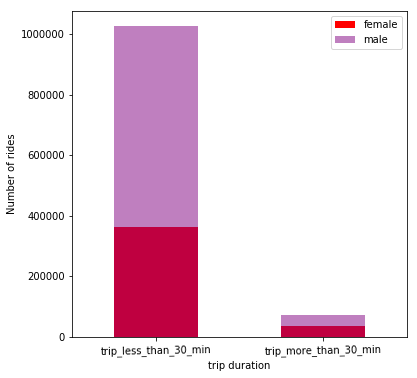

In [59]:
fig = pl.figure(figsize(6,6))

norm_w = 1
(counts_w / norm_w).plot(kind="bar", color='Red', label='female')

norm_m = 1
ax = (counts_m / norm_m).plot(kind="bar", color='Purple', alpha=0.5, label='male')
                                                                                                                                                                          
tmp = ax.xaxis.set_ticklabels(['trip_less_than_30_min', 'trip_more_than_30_min'], fontsize=10, rotation = True)
ax.set_xlabel('trip duration', fontsize=10)
ax.set_ylabel ("Number of rides",fontsize=10)
pl.legend()

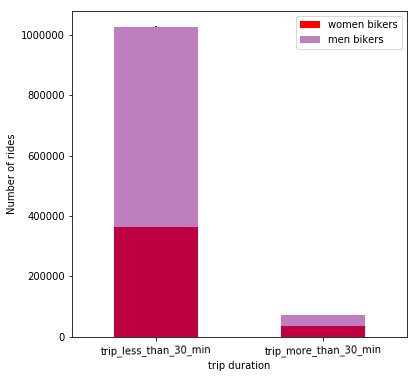

In [61]:
fig=pl.figure(figsize(6,6))

norm_w = 1
error_w = np.sqrt(counts_w)
ax=(counts_w/norm_w).plot(kind="bar",color='Red',  yerr=[(error_w/ norm_w, error_w/ norm_w)], label='women bikers')


counts_m = df1['trip_more_than_30_min'][df.gender==1].groupby([df1['trip_more_than_30_min']]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
(counts_m/ norm_m).plot(kind="bar", alpha=0.5, yerr=[(error_m/norm_m, error_m/ norm_m)], color='Purple', label='men bikers')
ax.xaxis.set_ticklabels(['trip_less_than_30_min', 'trip_more_than_30_min'], fontsize=10, rotation = True)
ax.set_ylabel ("Number of rides",fontsize=10)
ax.set_xlabel ("trip duration",fontsize=10)
pl.legend(['women bikers','men bikers'],fontsize=10)

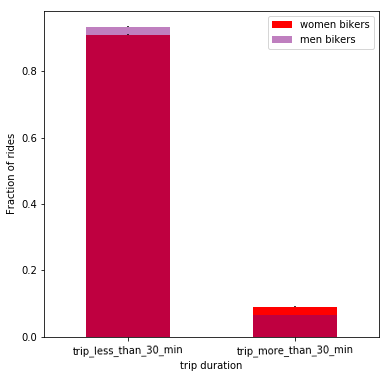

In [62]:
fig = pl.figure(figsize(6,6))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
(counts_w/ norm_w).plot(kind="bar", color='Red', yerr=[(error_w/norm_w, error_w/ norm_w)], label='women bikers')

norm_m = counts_m.sum()
ax = (counts_m/ norm_m).plot(kind="bar", alpha=0.5, yerr=[(error_m/ norm_m, error_m/ norm_m)], color='Purple', label='men bikers')

ax.xaxis.set_ticklabels(['trip_less_than_30_min', 'trip_more_than_30_min'], fontsize=10, rotation = True)
ax.set_ylabel ("Fraction of rides", fontsize=10)
ax.set_xlabel ("trip duration", fontsize=10)

pl.legend(['women bikers','men bikers'],fontsize=10)